In [1]:
import gzip
import json
import re
import os
import sys
import numpy as np
import pandas as pd

Datasets Directory

In [2]:
DIR = './data'

Function to load zipped datasets

In [3]:
def load_data(file_name, head = 500):
    count = 0
    data = []
    with gzip.open(file_name) as fin:
        for l in fin:
            d = json.loads(l)
            count += 1
            data.append(d)
            
            # break if reaches the 100th line
            if (head is not None) and (count > head):
                break
    return data

Load and display sample records of books ~/authors/works/series~

In [4]:
books = load_data(os.path.join(DIR, 'goodreads_books.json.gz'))

In [5]:
print(' == sample record (books) ==')
np.random.choice(books)

 == sample record (books) ==


{'isbn': '159291277X',
 'text_reviews_count': '4',
 'series': ['834956'],
 'country_code': 'US',
 'language_code': '',
 'popular_shelves': [{'count': '35', 'name': 'to-read'},
  {'count': '7', 'name': 'comics'},
  {'count': '3', 'name': 'graphic-novel'},
  {'count': '3', 'name': 'owned'},
  {'count': '2', 'name': 'war-stories'},
  {'count': '2', 'name': 'war'},
  {'count': '2', 'name': 'fiction'},
  {'count': '1', 'name': '2017-reads'},
  {'count': '1', 'name': '20th-century'},
  {'count': '1', 'name': 'grade-10-on-shelf'},
  {'count': '1', 'name': 'graphic-novels-for-my-future-high-s'},
  {'count': '1', 'name': 'library-tpbs'},
  {'count': '1', 'name': 'old-want-to-read'},
  {'count': '1', 'name': 'manga-other-comic-books'},
  {'count': '1', 'name': 'world-war-2'},
  {'count': '1', 'name': 'graphic-novels'},
  {'count': '1', 'name': 'history-world-war-ii'},
  {'count': '1', 'name': 'fiction-war'},
  {'count': '1', 'name': 'favorites'},
  {'count': '1', 'name': 'anthology'},
  {'count'

In [6]:
display(type(books[0]))
display(len(books[0]))
display(books[0])

dict

29

{'isbn': '0312853122',
 'text_reviews_count': '1',
 'series': [],
 'country_code': 'US',
 'language_code': '',
 'popular_shelves': [{'count': '3', 'name': 'to-read'},
  {'count': '1', 'name': 'p'},
  {'count': '1', 'name': 'collection'},
  {'count': '1', 'name': 'w-c-fields'},
  {'count': '1', 'name': 'biography'}],
 'asin': '',
 'is_ebook': 'false',
 'average_rating': '4.00',
 'kindle_asin': '',
 'similar_books': [],
 'description': '',
 'format': 'Paperback',
 'link': 'https://www.goodreads.com/book/show/5333265-w-c-fields',
 'authors': [{'author_id': '604031', 'role': ''}],
 'publisher': "St. Martin's Press",
 'num_pages': '256',
 'publication_day': '1',
 'isbn13': '9780312853129',
 'publication_month': '9',
 'edition_information': '',
 'publication_year': '1984',
 'url': 'https://www.goodreads.com/book/show/5333265-w-c-fields',
 'image_url': 'https://images.gr-assets.com/books/1310220028m/5333265.jpg',
 'book_id': '5333265',
 'ratings_count': '3',
 'work_id': '5400751',
 'title': '

In [7]:
len(books)

501

In [8]:
df_books = pd.DataFrame(books)

In [9]:
df_books.head()

,isbn,text_reviews_count,series,country_code,language_code,popular_shelves,asin,is_ebook,average_rating,kindle_asin,...,publication_month,edition_information,publication_year,url,image_url,book_id,ratings_count,work_id,title,title_without_series
0,0312853122,1,[],US,,"[{'count': '3', 'name': 'to-read'}, {'count': ...",,false,4.00,,...,9,,1984,https://www.goodreads.com/book/show/5333265-w-...,https://images.gr-assets.com/books/1310220028m...,5333265,3,5400751,W.C. Fields: A Life on Film,W.C. Fields: A Life on Film
1,0743509986,6,[],US,,"[{'count': '2634', 'name': 'to-read'}, {'count...",,false,3.23,B000FC0PBC,...,10,Abridged,2001,https://www.goodreads.com/book/show/1333909.Go...,https://s.gr-assets.com/assets/nophoto/book/11...,1333909,10,1323437,Good Harbor,Good Harbor
2,,7,[189911],US,eng,"[{'count': '58', 'name': 'to-read'}, {'count':...",B00071IKUY,false,4.03,,...,,Book Club Edition,1987,https://www.goodreads.com/book/show/7327624-th...,https://images.gr-assets.com/books/1304100136m...,7327624,140,8948723,"The Unschooled Wizard (Sun Wolf and Starhawk, ...","The Unschooled Wizard (Sun Wolf and Starhawk, ..."
3,0743294297,3282,[],US,eng,"[{'count': '7615', 'name': 'to-read'}, {'count...",,false,3.49,B002ENBLOK,...,7,,2009,https://www.goodreads.com/book/show/6066819-be...,https://s.gr-assets.com/assets/nophoto/book/11...,6066819,51184,6243154,Best Friends Forever,Best Friends Forever
4,0850308712,5,[],US,,"[{'count': '32', 'name': 'to-read'}, {'count':...",,false,3.40,,...,,,,https://www.goodreads.com/book/show/287140.Run...,https://images.gr-assets.com/books/1413219371m...,287140,15,278577,Runic Astrology: Starcraft and Timekeeping in ...,Runic Astrology: Starcraft and Timekeeping in ...


In [10]:
df_books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501 entries, 0 to 500
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   isbn                  501 non-null    object
 1   text_reviews_count    501 non-null    object
 2   series                501 non-null    object
 3   country_code          501 non-null    object
 4   language_code         501 non-null    object
 5   popular_shelves       501 non-null    object
 6   asin                  501 non-null    object
 7   is_ebook              501 non-null    object
 8   average_rating        501 non-null    object
 9   kindle_asin           501 non-null    object
 10  similar_books         501 non-null    object
 11  description           501 non-null    object
 12  format                501 non-null    object
 13  link                  501 non-null    object
 14  authors               501 non-null    object
 15  publisher             501 non-null    ob

In [11]:
df_books.describe()

,isbn,text_reviews_count,series,country_code,language_code,popular_shelves,asin,is_ebook,average_rating,kindle_asin,...,publication_month,edition_information,publication_year,url,image_url,book_id,ratings_count,work_id,title,title_without_series
count,501,501,501,501,501,501,501,501,501,501,...,501,501,501,501,501,501,501,501,501,501
unique,275,77,167,1,36,487,123,2,145,209,...,13,34,48,501,303,501,180,500,500,500
top,,1,[],US,,[],,false,4.00,,...,,,,https://www.goodreads.com/book/show/35235890-s...,https://s.gr-assets.com/assets/nophoto/book/11...,1393555,1,44921509,Cellular Spirits,Cellular Spirits
freq,227,131,335,501,206,8,379,340,27,292,...,210,455,155,1,199,1,31,2,2,2


nur 275 unique ISBNs, 123 ASIN... hm. ISBN sollte eigentlich schon überall gesetzt sein..

In [12]:
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns

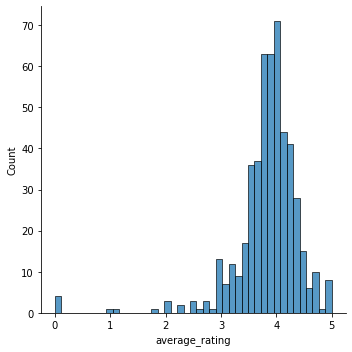

In [13]:
sns.displot(df_books["average_rating"].astype(float))

In [73]:
df_books.style.highlight_max(axis=1)
df_books.head()

,isbn,text_reviews_count,series,country_code,language_code,popular_shelves,asin,is_ebook,average_rating,kindle_asin,...,publication_month,edition_information,publication_year,url,image_url,book_id,ratings_count,work_id,title,title_without_series
0,0312853122,1,[],US,,"[{'count': '3', 'name': 'to-read'}, {'count': ...",,false,4.00,,...,9,,1984,https://www.goodreads.com/book/show/5333265-w-...,https://images.gr-assets.com/books/1310220028m...,5333265,3,5400751,W.C. Fields: A Life on Film,W.C. Fields: A Life on Film
1,0743509986,6,[],US,,"[{'count': '2634', 'name': 'to-read'}, {'count...",,false,3.23,B000FC0PBC,...,10,Abridged,2001,https://www.goodreads.com/book/show/1333909.Go...,https://s.gr-assets.com/assets/nophoto/book/11...,1333909,10,1323437,Good Harbor,Good Harbor
2,,7,[189911],US,eng,"[{'count': '58', 'name': 'to-read'}, {'count':...",B00071IKUY,false,4.03,,...,,Book Club Edition,1987,https://www.goodreads.com/book/show/7327624-th...,https://images.gr-assets.com/books/1304100136m...,7327624,140,8948723,"The Unschooled Wizard (Sun Wolf and Starhawk, ...","The Unschooled Wizard (Sun Wolf and Starhawk, ..."
3,0743294297,3282,[],US,eng,"[{'count': '7615', 'name': 'to-read'}, {'count...",,false,3.49,B002ENBLOK,...,7,,2009,https://www.goodreads.com/book/show/6066819-be...,https://s.gr-assets.com/assets/nophoto/book/11...,6066819,51184,6243154,Best Friends Forever,Best Friends Forever
4,0850308712,5,[],US,,"[{'count': '32', 'name': 'to-read'}, {'count':...",,false,3.40,,...,,,,https://www.goodreads.com/book/show/287140.Run...,https://images.gr-assets.com/books/1413219371m...,287140,15,278577,Runic Astrology: Starcraft and Timekeeping in ...,Runic Astrology: Starcraft and Timekeeping in ...


In [39]:
b = a['popular_shelves'].apply(pd.Series).merge(a, left_index = True, right_index = True).drop(['popular_shelves',0], axis = 1)
b.head()


,count,name,isbn,text_reviews_count,series,country_code,language_code,asin,is_ebook,average_rating,...,publication_month,edition_information,publication_year,url,image_url,book_id,ratings_count,work_id,title,title_without_series
0,3,to-read,0312853122,1,[],US,,,false,4.00,...,9,,1984,https://www.goodreads.com/book/show/5333265-w-...,https://images.gr-assets.com/books/1310220028m...,5333265,3,5400751,W.C. Fields: A Life on Film,W.C. Fields: A Life on Film
0,3,to-read,0312853122,1,[],US,,,false,4.00,...,9,,1984,https://www.goodreads.com/book/show/5333265-w-...,https://images.gr-assets.com/books/1310220028m...,5333265,3,5400751,W.C. Fields: A Life on Film,W.C. Fields: A Life on Film
0,3,to-read,0312853122,1,[],US,,,false,4.00,...,9,,1984,https://www.goodreads.com/book/show/5333265-w-...,https://images.gr-assets.com/books/1310220028m...,5333265,3,5400751,W.C. Fields: A Life on Film,W.C. Fields: A Life on Film
0,3,to-read,0312853122,1,[],US,,,false,4.00,...,9,,1984,https://www.goodreads.com/book/show/5333265-w-...,https://images.gr-assets.com/books/1310220028m...,5333265,3,5400751,W.C. Fields: A Life on Film,W.C. Fields: A Life on Film
0,3,to-read,0312853122,1,[],US,,,false,4.00,...,9,,1984,https://www.goodreads.com/book/show/5333265-w-...,https://images.gr-assets.com/books/1310220028m...,5333265,3,5400751,W.C. Fields: A Life on Film,W.C. Fields: A Life on Film


In [42]:
b.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2312023 entries, 0 to 500
Data columns (total 30 columns):
 #   Column                Dtype 
---  ------                ----- 
 0   count                 object
 1   name                  object
 2   isbn                  object
 3   text_reviews_count    object
 4   series                object
 5   country_code          object
 6   language_code         object
 7   asin                  object
 8   is_ebook              object
 9   average_rating        object
 10  kindle_asin           object
 11  similar_books         object
 12  description           object
 13  format                object
 14  link                  object
 15  authors               object
 16  publisher             object
 17  num_pages             object
 18  publication_day       object
 19  isbn13                object
 20  publication_month     object
 21  edition_information   object
 22  publication_year      object
 23  url                   object
 24  im

duplicates definitely need to be removed beforehand.
- how to find all of them?
- [ ] same title
- [ ] same kindle_asin
- [ ] very close title (how?)
- [ ] how to combine them? reviews? create an extra index? so the review don't get lost?

In [23]:
pd.concat(g for _, g in df_books.groupby("title") if len(g) > 1)


,isbn,text_reviews_count,series,country_code,language_code,popular_shelves,asin,is_ebook,average_rating,kindle_asin,...,publication_month,edition_information,publication_year,url,image_url,book_id,ratings_count,work_id,title,title_without_series
337,0986419400,4,[],US,eng,"[{'count': '7', 'name': 'to-read'}, {'count': ...",,false,4.75,B00S9D3DUO,...,2,,2015,https://www.goodreads.com/book/show/25208146-c...,https://images.gr-assets.com/books/1427200014m...,25208146,6,44921509,Cellular Spirits,Cellular Spirits
341,,1,[],US,en-US,"[{'count': '7', 'name': 'to-read'}, {'count': ...",B00S9D3DUO,true,4.75,B00S9D3DUO,...,1,,2015,https://www.goodreads.com/book/show/25208149-c...,https://images.gr-assets.com/books/1427200078m...,25208149,2,44921509,Cellular Spirits,Cellular Spirits
